## Paso 1: Carga del conjunto de datos

In [3]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


## Paso 2: Construye y analiza la serie temporal
Construye la estructura de datos válida para la serie temporal, grafícala y, a continuación, analízala y responde a las siguientes preguntas:

¿Cuál es el tensor de la serie temporal?
¿Cuál es la tendencia?
¿Es estacionaria?
¿Existe variabilidad o presencia de ruido?

In [4]:
total_data['date'] = pd.to_datetime(total_data['date'])

total_data['date'] = total_data['date'].dt.date
total_data.set_index('date', inplace=True)
ts=total_data['sales']

total_data.head()


,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


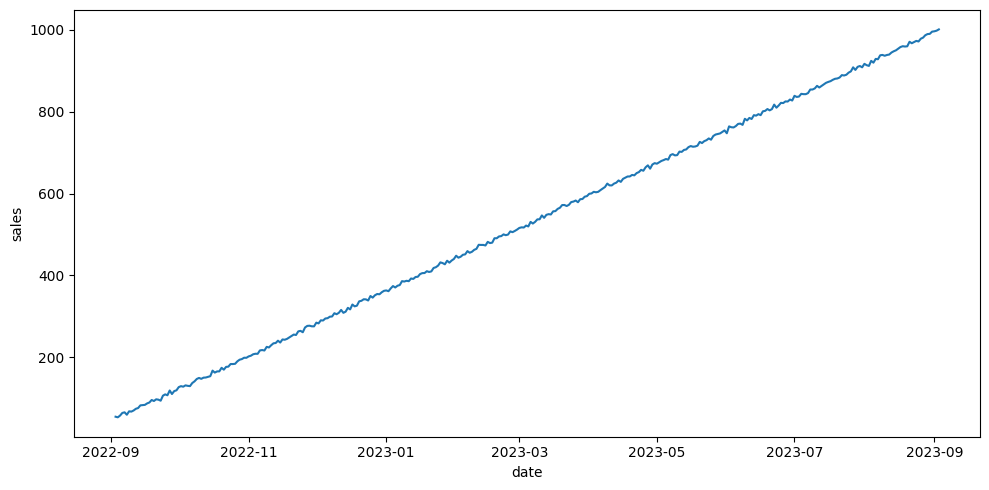

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 30)
decomposition

Análisis Tensor:
· El tensor en esta serie temporal son los días

Análisis Tendencia

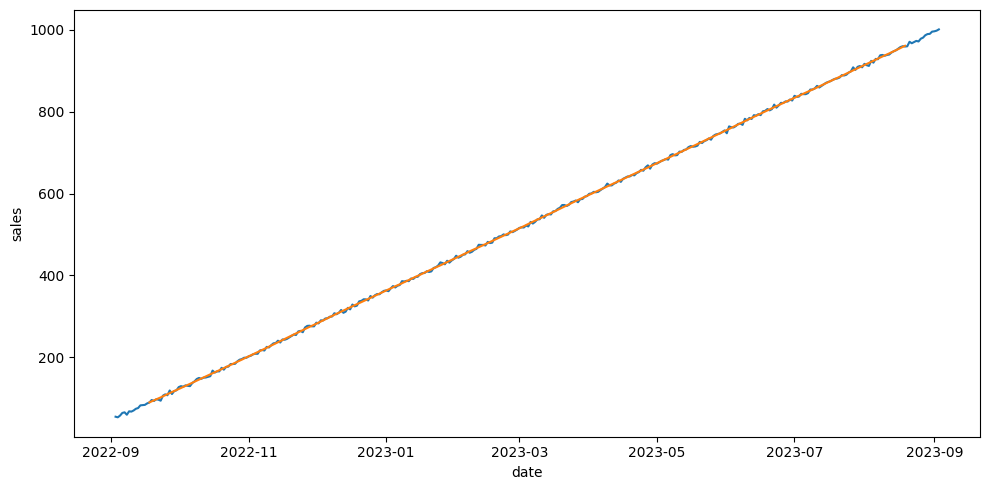

In [7]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Análisis de la Estacionalidad

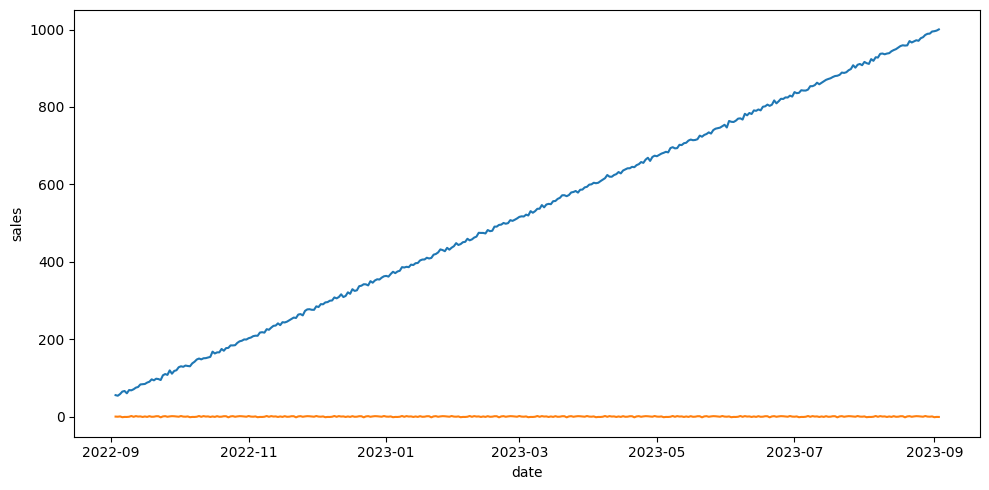

In [8]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

Prueba de Dickey-Fuller

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Análisis de Variabilidad

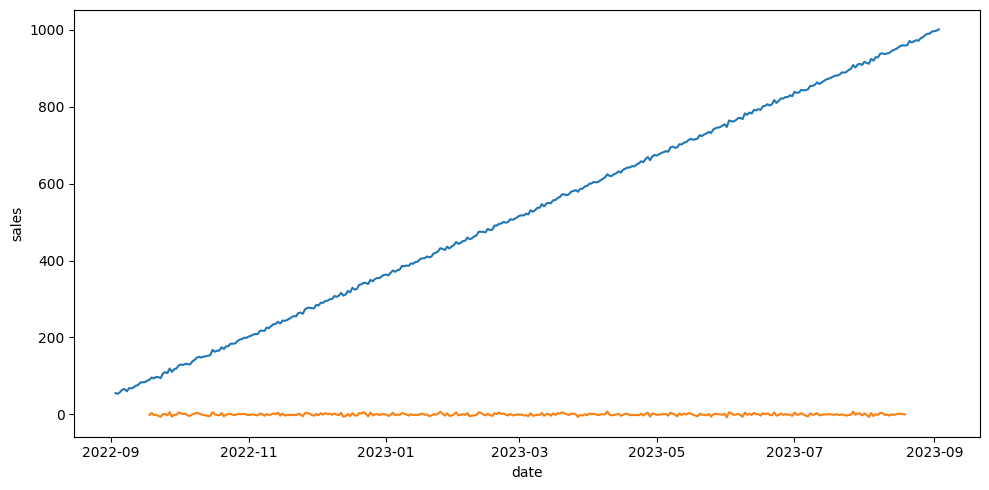

In [10]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Análisis de la autocorrelación

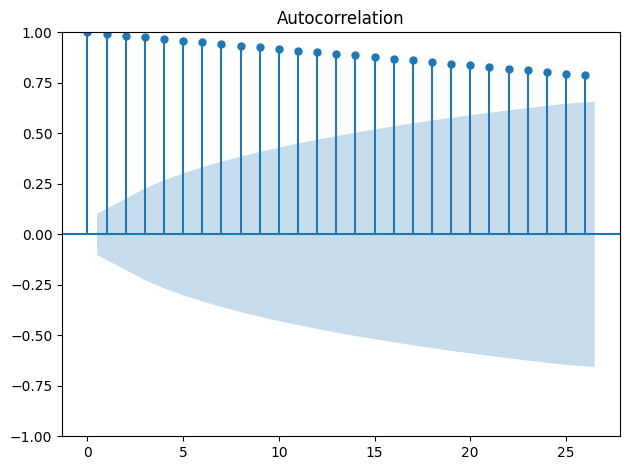

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

## Paso 3: Entrena un ARIMA

In [12]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [13]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 30)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=1845.252, Time=4.27 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1971.739, Time=0.54 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=2209.657, Time=0.01 sec


 ARIMA(2,0,2)(0,0,1)[30] intercept   : AIC=1843.274, Time=3.90 sec
 ARIMA(2,0,2)(0,0,0)[30] intercept   : AIC=1843.049, Time=0.38 sec
 ARIMA(2,0,2)(1,0,0)[30] intercept   : AIC=1843.220, Time=3.23 sec
 ARIMA(1,0,2)(0,0,0)[30] intercept   : AIC=1843.587, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[30] intercept   : AIC=1841.533, Time=0.55 sec
 ARIMA(2,0,1)(1,0,0)[30] intercept   : AIC=1841.467, Time=4.16 sec
 ARIMA(2,0,1)(2,0,0)[30] intercept   : AIC=1843.495, Time=16.91 sec
 ARIMA(2,0,1)(1,0,1)[30] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(2,0,1)(0,0,1)[30] intercept   : AIC=1841.425, Time=3.33 sec
 ARIMA(2,0,1)(0,0,2)[30] intercept   : AIC=1843.425, Time=15.70 sec
 ARIMA(2,0,1)(1,0,2)[30] intercept   : AIC=inf, Time=17.00 sec
 ARIMA(1,0,1)(0,0,1)[30] intercept   : AIC=1839.439, Time=1.81 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=1839.553, Time=0.21 sec
 ARIMA(1,0,1)(1,0,1)[30] intercept   : AIC=1841.563, Time=3.32 sec
 ARIMA(1,0,1)(0,0,2)[30] intercept   : AIC=1841.438, Time=6.92 sec
 A

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 30)   Log Likelihood                -914.720
Date:                            Wed, 24 Apr 2024   AIC                           1839.439
Time:                                    19:26:40   BIC                           1858.939
Sample:                                09-04-2022   HQIC                          1847.188
                                     - 09-03-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8192      0.134     20.986      0.000       2.556       3.083
ar.L1         -0.0850      0.052     -1.641      0.101      -0.187       0.016
ma.L1         -0.9435      0.020    -47.190      0.000      -0.983      -0.904
ma.S.L30      -0.0806      0.061     -1.323      0.186      -0.200       0.039
sigma2         8.7304      0.683     12.788      0.000       7.392      10.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.99   Prob(JB):                         0.68
Heteroskedasticity (H):               0.92   Skew:                             0.07
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
forecast = model.predict(30)
forecast

2023-09-04    2.046149
2023-09-05    2.162499
2023-09-06    2.827505
2023-09-07    2.042483
2023-09-08    2.743390
2023-09-09    2.940540
2023-09-10    2.700119
2023-09-11    2.713957
2023-09-12    2.406173
2023-09-13    2.549262
2023-09-14    2.623742
2023-09-15    2.473212
2023-09-16    2.492436
2023-09-17    2.652892
2023-09-18    2.882323
2023-09-19    2.762238
2023-09-20    1.895069
2023-09-21    3.122267
2023-09-22    2.592938
2023-09-23    2.547498
2023-09-24    2.915993
2023-09-25    2.220297
2023-09-26    2.657565
2023-09-27    2.298700
2023-09-28    2.585472
2023-09-29    2.799282
2023-09-30    2.337586
2023-10-01    2.780178
2023-10-02    2.710634
2023-10-03    2.493399
Freq: D, dtype: float64

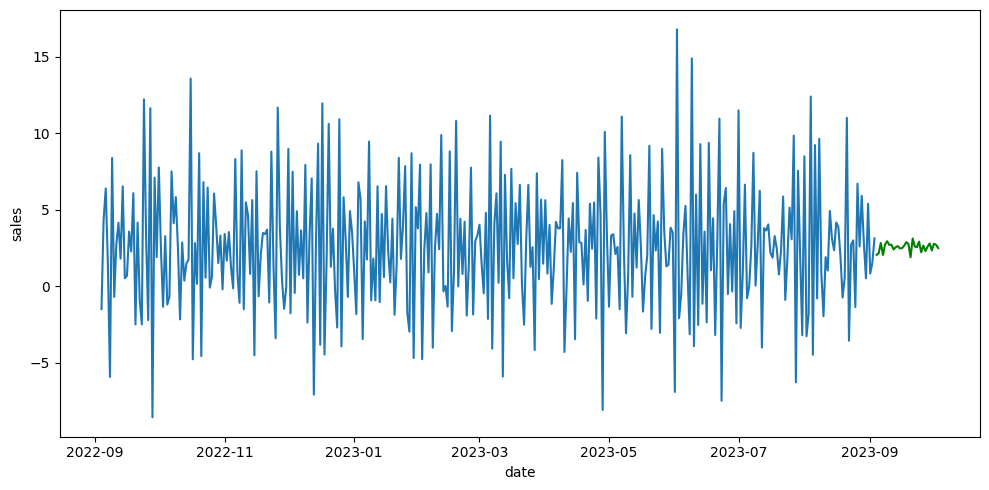

In [16]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()